# pyWRspice Wrapper Tutorial: Parse a SPICE script

#### Prerequisite:
* You need to complete the *Tutorial.ipynb* notebook first.

Here we assume you are already famililar with running PyWRspice on a local computer.

In [1]:
# Add pyWRspice location to system path, if you haven't run setup.py
import sys
sys.path.append("../")

In [2]:
import numpy as np
import logging, importlib
from pyWRspice import parse

import matplotlib.pyplot as plt
%matplotlib inline
logging.basicConfig(level=logging.WARNING)

### Parse a SPICE script

The class ```parse.Parse``` (WIP) parses a SPICE script into a ```script.Script``` object.

It is advisable not to include the ```.control ... write ...``` block in the script because this can be overlapped with the ```config_save``` function later. If such control block is in the original script, do not call the ```config_save``` function.

Here we demonstrate parsing the circuit in the last example of _Tutorial.ipynb_

In [3]:
script1 = """*Transient response of a transmission line
.tran 50p 100n
.subckt segment 1 3
R1 1 2 0.1
L1 2 3 1n
C1 3 0 {cap}p
R2 3 0 1000.0
.ends segment
X1 1 2 segment
X2 2 3 segment
X3 3 4 segment
X4 4 5 segment
X5 5 6 segment
X6 6 7 segment
X7 7 8 segment
X8 8 9 segment
X9 9 10 segment
X10 10 11 segment
* Pulse source
V1 1 0 pulse(0 1 1n 1n 1n {dur}n)
* Load resistance
Rload 11 0 50
"""

In [4]:
# Parse the script
scr = parse.Parse(script1)

In [5]:
# Double check if it parsed correctly
print(scr.script())

**Transient response of a transmission line

.subckt segment 1 3
R1 1 2 0.1
L1 2 3 1n
C1 3 0 {cap}p
R2 3 0 1000.0
.ends segment
X1 1 2 segment
X2 2 3 segment
X3 3 4 segment
X4 4 5 segment
X5 5 6 segment
X6 6 7 segment
X7 7 8 segment
X8 8 9 segment
X9 9 10 segment
X10 10 11 segment
V1 1 0 pulse(0 1 1n 1n 1n {dur}n)
Rload 11 0 50

.tran 50p 100n



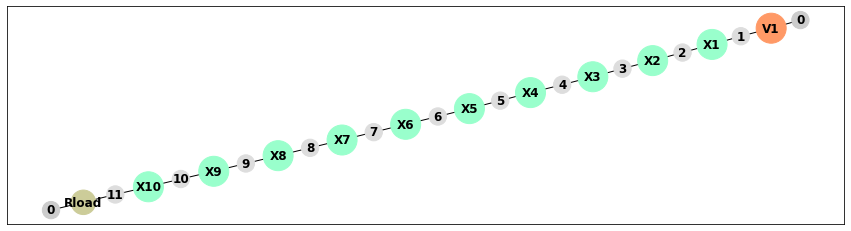

In [8]:
# Plot the main circuit
plt.figure(figsize=(15,4))
scr.plot()

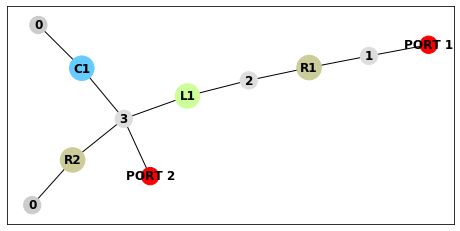

In [10]:
# Plot the subcircuit
plt.figure(figsize=(8,4))
scr.circuits[0].subcircuits["segment"].plot()

In [9]:
# Explore the circuit elements
scr.circuits[0].components

{'X1': X1 1 2 segment,
 'X2': X2 2 3 segment,
 'X3': X3 3 4 segment,
 'X4': X4 4 5 segment,
 'X5': X5 5 6 segment,
 'X6': X6 6 7 segment,
 'X7': X7 7 8 segment,
 'X8': X8 8 9 segment,
 'X9': X9 9 10 segment,
 'X10': X10 10 11 segment,
 'V1': V1 1 0 pulse(0 1 1n 1n 1n {dur}n),
 'Rload': Rload 11 0 50}